In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [104]:
# dat_failai_d0_ref = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day0\REF*.dat')
# dat_failai_d1_ref = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day1\REF*.dat')
# dat_failai_d2_ref = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day2\REF*.dat')
# dat_failai_d0_V = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day0\V1145*.dat')
# dat_failai_d1_V = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day1\V1145*.dat')
# dat_failai_d2_V = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day2\V1145*.dat')
dat_failai={'d0ref': None, 'd1ref': None, 'd2ref': None, 'd0v': None, 'd1v': None, 'f2v': None}
dat_failai['d0ref'] = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day0\REF*.dat')
dat_failai['d1ref'] = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day1\REF*.dat')
dat_failai['d2ref'] = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day2\REF*.dat')
dat_failai['d0v'] = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day0\V1145*.dat')
dat_failai['d1v'] = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day1\V1145*.dat')
dat_failai['d2v'] = glob.glob(r'C:\Users\pauli\Desktop\DATA\Day2\V1145*.dat')

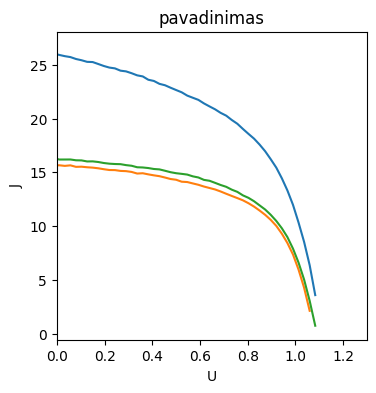

C:\Users\pauli\Desktop\DATA\Day0\REF_D_1k_FW_2.08.dat C:\Users\pauli\Desktop\DATA\Day1\REF_D_1k_24h_FW_2.03.dat C:\Users\pauli\Desktop\DATA\Day2\REF_D_1k_48h_x2_FW_2.03.dat


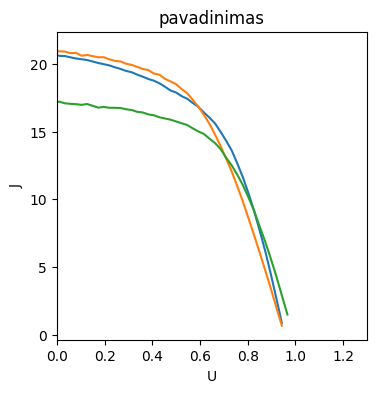

C:\Users\pauli\Desktop\DATA\Day0\V1145_A_5k_FW_2.03.dat C:\Users\pauli\Desktop\DATA\Day1\V1145_A_4k_24h_FW_2.03.dat C:\Users\pauli\Desktop\DATA\Day2\V1145_A_4k_48h_FW_2.05.dat


In [ ]:
def max_naudingumas(failai):
    naudingiausias= failai[0]
    maziausias = 100
    for i in failai:
        c1, c3, c4 = nuskaitom(i)
        if maziausias > min(c4):
            maziausias = min(c4)
            naudingiausias = i
    return naudingiausias

def nuskaitom(f):
    failas = open(f, mode='r', encoding='utf-8')
    turinys = failas.readlines()[1:]
    failas.close()
        
    c1, c3, c4 = [], [], []
    for line in turinys:
        fs = line.split(';')
        c1.append(float(fs[0]))
        c3.append(float(fs[2]))
        c4.append(float(fs[3]))
    
    return c1, c3, c4

def grafikas(f1, f2, f3):
    f1c1, f1c3, f1c4 = [], [], []
    f2c1, f2c3, f1c4 = [], [], []
    f3c1, f3c3, f1c4 = [], [], []
    f1c1n, f1c3n, f2c1n, f2c3n, f3c1n, f3c3n = [], [], [], [], [], []
    f1c1, f1c3, f1c4 = nuskaitom(f1)
    f2c1, f2c3, f2c4 = nuskaitom(f2)
    f3c1, f3c3, f3c4 = nuskaitom(f3)
    
    
    f1c3=[-x for x in f1c3]
    f2c3=[-x for x in f2c3]
    f3c3=[-x for x in f3c3]
    for i in range(len(f1c3)):
        if f1c3[i] > 0:
            f1c3n.append(f1c3[i])
            f1c1n.append(f1c1[i])
            
    for i in range(len(f2c3)):
        if f2c3[i] > 0:
            f2c3n.append(f2c3[i])
            f2c1n.append(f2c1[i])
            
    for i in range(len(f3c3)):
        if f3c3[i] > 0:
            f3c3n.append(f3c3[i])
            f3c1n.append(f3c1[i])
            


    fig, axis = plt.subplots(figsize=(4, 4))
    axis.plot(f1c1n, f1c3n, label="Dataset 1")
    axis.plot(f2c1n, f2c3n, label="Dataset 2")
    axis.plot(f3c1n, f3c3n, label="Dataset 3")
    # axis.set_xticks('bla')
    axis.set_xlabel('U')
    axis.set_ylabel('J')
    plt.title('pavadinimas')
    axis.set_xlim(left=0, right=1.3)
    # plt.tight_layout()
    plt.show()
    

naudingiausias1 = max_naudingumas(dat_failai['d0ref'])
naudingiausias2 = max_naudingumas(dat_failai['d1ref'])
naudingiausias3 = max_naudingumas(dat_failai['d2ref'])
grafikas(naudingiausias1, naudingiausias2, naudingiausias3)
print(naudingiausias1, naudingiausias2, naudingiausias3)

naudingiausias1 = max_naudingumas(dat_failai['d0v'])
naudingiausias2 = max_naudingumas(dat_failai['d1v'])
naudingiausias3 = max_naudingumas(dat_failai['d2v'])
grafikas(naudingiausias1, naudingiausias2, naudingiausias3)
print(naudingiausias1, naudingiausias2, naudingiausias3)

In [95]:
naudingiausiasref = max_naudingumas(dat_failai['d0ref'])
naudingiausiasV = max_naudingumas(dat_failai['d0v'])

ndref0=(str(naudingiausiasref)).split('_')
ndV0=(str(naudingiausiasV)).split('_')

for i in dat_failai['d1ref']:
    j=(str(i)).split('_')
    if j[1] == ndref0[1] and j[2] == ndref0[2]:
        ndref1 = i

for i in dat_failai['d2ref']:
    j=(str(i)).split('_')
    if j[1] == ndref0[1] and j[2] == ndref0[2]:
        ndref2 = i
        
for i in dat_failai['d1v']:
    j=(str(i)).split('_')
    if j[1] == ndV0[1] and j[2] == ndV0[2]:
        ndv1 = i

for i in dat_failai['d2v']:
    j=(str(i)).split('_')
    if j[1] == ndV0[1] and j[2] == ndV0[2]:
        ndv2 = i

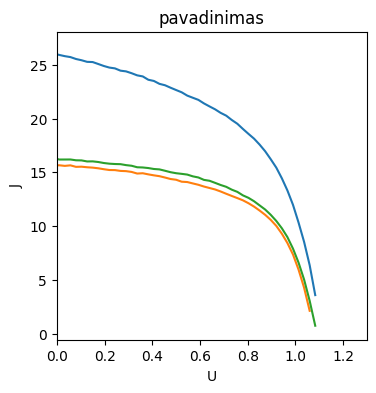

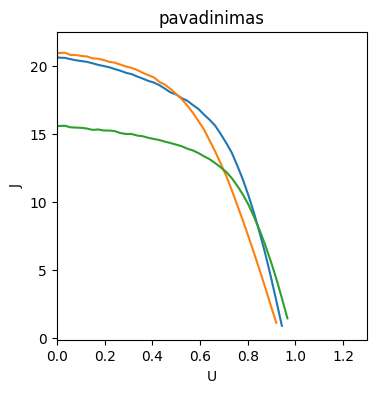

In [100]:
grafikas(naudingiausiasref, ndref1, ndref2)
grafikas(naudingiausiasV, ndv1, ndv2)

In [142]:
df=pd.read_csv(r'C:\Users\pauli\Desktop\DATA\Day0\REF_D_1k_FW_2.08.dat', delimiter= ';')
df.columns


Index(['U[V] ', ' I[A] ', ' j[mA/cm^2] ', ' P[mW/cm^2]'], dtype='object')

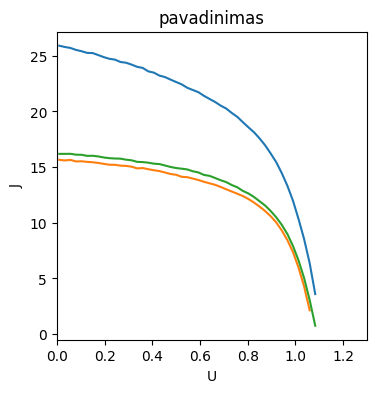

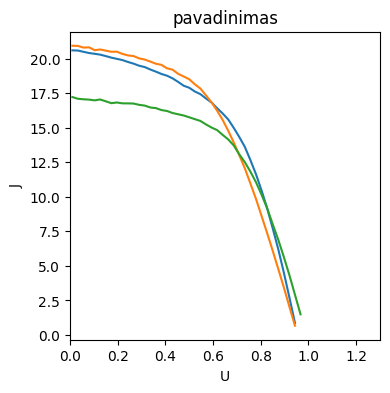

In [ ]:
def maxNaudingumas(f):
    maziausia = 100
    for i in f:
        df=pd.read_csv(i, delimiter= ';')
        if df[' P[mW/cm^2]'].min() < maziausia:
            maziausia = df[' P[mW/cm^2]'].min()
            naudingiausias = i
    return naudingiausias

def grafikelis(n1, n2, n3):
    df1=pd.read_csv(n1, delimiter= ';')
    df2=pd.read_csv(n2, delimiter= ';')
    df3=pd.read_csv(n3, delimiter= ';')
    df1=df1.astype(float)
    df2=df2.astype(float)
    df3=df3.astype(float)
    df1 = df1[df1[' P[mW/cm^2]'] < 0]
    df2 = df2[df2[' P[mW/cm^2]'] < 0]
    df3 = df3[df3[' P[mW/cm^2]'] < 0]
    df1[' j[mA/cm^2] ']= df1[' j[mA/cm^2] '] *(-1)
    df2[' j[mA/cm^2] ']= df2[' j[mA/cm^2] '] *(-1)
    df3[' j[mA/cm^2] ']= df3[' j[mA/cm^2] '] *(-1)
    
    fig, axis = plt.subplots(figsize=(4, 4))
    axis.plot(df1['U[V] '], df1[' j[mA/cm^2] '], label="Dataset 1")
    axis.plot(df2['U[V] '], df2[' j[mA/cm^2] '], label="Dataset 2")
    axis.plot(df3['U[V] '], df3[' j[mA/cm^2] '], label="Dataset 3")
    # axis.set_xticks('bla')
    axis.set_xlabel('U')
    axis.set_ylabel('J')
    plt.title('pavadinimas')
    axis.set_xlim(left=0, right=1.3)
    # plt.tight_layout()
    plt.show()
    
    
naudingiausiasref0 = maxNaudingumas(dat_failai['d0ref'])
naudingiausiasref1 = maxNaudingumas(dat_failai['d1ref'])
naudingiausiasref2 = maxNaudingumas(dat_failai['d2ref'])

naudingiausiasv0 = maxNaudingumas(dat_failai['d0v'])
naudingiausiasv1 = maxNaudingumas(dat_failai['d1v'])
naudingiausiasv2 = maxNaudingumas(dat_failai['d2v'])

grafikelis(naudingiausiasref0, naudingiausiasref1, naudingiausiasref2)

grafikelis(naudingiausiasv0, naudingiausiasv1, naudingiausiasv2)